In [7]:
import numpy as np
import matplotlib.pyplot as plt
N = 1024
system_size = 10

amps_all_basis = np.load("amps_all_basis.npy")
amps_all_basis += np.random.rand(N, system_size)/(1e+9)
log_amps_all_basis = np.log(amps_all_basis)

In [8]:
N = 1024
system_size = 10
p_test = np.ones(N)
for i in range (system_size):
    p_test*= (np.abs(amps_all_basis)**2)[:,i]
    
print(np.sum(p_test))
probs_all_basis = np.abs(amps_all_basis)**2
print(probs_all_basis.shape)

1.0000001163567016
(1024, 10)


In [9]:
print(probs_all_basis[:,0].shape)
print(np.ones(1024))

(1024,)
[1. 1. 1. ... 1. 1. 1.]


In [10]:
p_abc = np.ones((1024))
for i in range (10):
    p_abc*= probs_all_basis[:,i]
log_p_abc = np.log(p_abc)
print(p_abc)
print(p_abc.shape)
print(np.unique(np.sum(np.split(p_abc, 2), axis = 0)).shape)

[7.36487836e-106 3.20954149e-088 4.18239119e-086 ... 1.35039835e-085
 1.83838650e-083 5.41927579e-103]
(1024,)
(512,)


In [16]:

# initialization

p_ab = np.ones((system_size, system_size, N))
log_p_ab = np.ones((system_size, system_size, N))
p_bc = np.ones((system_size, system_size, N))
log_p_bc = np.ones((system_size, system_size, N))
p_b = np.ones((system_size, system_size, N))
log_p_b = np.ones((system_size, system_size, N))



for i in range (1,system_size):
    for j in range (i, system_size):     # i, j is the cut position
        p_ab[i-1, j-1, :2**j] = np.sum(np.split(p_abc, 2**j), axis = 1)
        p_bc[i - 1, j - 1, : int(N/2**i)] = np.sum(np.split(p_abc, 2**i), axis = 0)
   
        if (j == i):
            continue
        else :
            p_b[i - 1, j - 1, : 2**(j-i)] = np.sum(np.split(p_ab[i - 1, j - 1, :2**j], 2**i), axis = 0)
            

In [ ]:
N = 1024
system_size = 10
# initialization

p_abc_new = np.ones((system_size, system_size+1, N))
p_ab = np.ones((system_size, system_size, N))
p_bc = np.ones((system_size, system_size, N))
p_b = np.ones((system_size, system_size, N))

cmi = []
for i in range (system_size-1):
    cmi.append(np.array([]))
for x in range (system_size):
    for i in range (x+1,system_size):
        for j in range (i, system_size):     # i, j is the cut position
            for k in range (j+1 ,system_size+1):
                    
                p_abc_new = np.ones((system_size, system_size+1, N))
                p_ab = np.ones((system_size, system_size, N))
                p_bc = np.ones((system_size, system_size, N))
                p_b = np.ones((system_size, system_size, N))
                
                p_abc_new[x, k, :2**(k-x)] = np.sum(np.split(np.sum(np.split(p_abc, 2**k), axis = 1), 2**x) , axis = 0)
                
                p_ab[i-1, j-1, :2**(j-x)] = np.sum(np.split(p_abc_new[x, k, :2**(k-x)], 2**(j-x)), axis = 1)
                
                p_bc[i - 1, j - 1, : int(2**(k-i))] = np.sum(np.split(p_abc_new[x, k, :2**(k-x)], 2**(i-x)), axis = 0)
                if (j == i):
                    pass
                else :
                    p_b[i - 1, j - 1, : 2**(j-i)] = np.sum(np.split(p_ab[i - 1, j - 1, :2**(j-x)], 2**(i-x)), axis = 0)
                cmi[j-i] = np.append(cmi[j-i],(np.sum(-p_ab[i-1, j-1]*np.log(p_ab[i-1, j-1]) -p_bc[i-1, j-1]*np.log(p_bc[i-1, j-1]) \
                                   + p_abc_new[x, k]*np.log(p_abc_new[x,k]) + p_b[i-1, j-1]*np.log(p_b[i-1, j-1]))))
                                            

In [12]:
log_cmi = []
for i in range (system_size-1):
    log_cmi.append(np.array([]))
    log_cmi[i] = np.append(log_cmi[i], np.log(cmi[i]))

log_cmi_data = np.zeros(9)
log_cmi_var = np.zeros(9)
for i in range (len(log_cmi_data)):
    log_cmi_data[i] = np.average(log_cmi[i])
    log_cmi_var[i] = np.std(log_cmi[i])

In [15]:
print(log_cmi[8])

[-3.8396725]


No handles with labels found to put in legend.


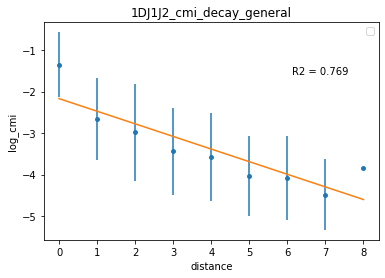

In [24]:
a, b = np.polyfit(np.arange(system_size-1), log_cmi_data, 1)
r2 = 1 - np.sum((a*np.arange(system_size-1)+b*np.ones(system_size-1)-log_cmi_data)**2) \
/np.sum((log_cmi_data - np.sum(log_cmi_data)/(system_size-1))**2) 
ls = 'dotted'

plt.scatter(np.arange(system_size-1), log_cmi_data, s = 15 )
plt.errorbar(np.arange(system_size-1), log_cmi_data, yerr = log_cmi_var, linestyle='None')
plt.plot(np.arange(system_size-1), a*np.arange(system_size-1)+b*np.ones(system_size-1))


plt.xlabel("distance")
plt.ylabel("log_cmi")
plt.figtext(0.7,0.7,'R2 = ' + str(np.round(r2,3)))
plt.title("1DJ1J2_cmi_decay_general")
plt.legend()
plt.savefig("1DJ1J2_cmi_decay_general.png", dpi = 200)

In [17]:
cmi = np.zeros((system_size, system_size))  # conditional mutual information
print(p_ab.shape)
print(p_bc.shape)
print(p_abc.shape)
for i in range (0, system_size-1):
    for j in range (i , system_size-1):
        cmi[i, j] = np.sum(-p_ab[i, j]*np.log(p_ab[i, j]) -p_bc[i, j]*np.log(p_bc[i, j]) + p_abc*log_p_abc + p_b[i, j]*np.log(p_b[i, j]))
cmi = cmi[:-1,:-1]

(10, 10, 1024)
(10, 10, 1024)
(1024,)


In [20]:

cmi_distance = np.zeros(system_size-1)

for i in range(0, system_size-1):
    for j in range(i, system_size-1):
        cmi_distance[j - i] += cmi[i, j]/(system_size-(j-i)-1)
print(cmi_distance)
print(np.log(cmi_distance[-1]))

[0.52629851 0.23146452 0.17385828 0.11441236 0.08722317 0.0564453
 0.04284582 0.0263205  0.02150064]
-3.8396725041729827


In [26]:

a, b = np.polyfit(np.arange(system_size-1), np.log(cmi_distance), 1)
r2 = 1 - np.sum((a*np.arange(system_size-1)+b*np.ones(system_size-1)-np.log(cmi_distance))**2) \
/np.sum((np.log(cmi_distance) - np.sum(np.log(cmi_distance))/(system_size-1))**2)
r2

0.9837114440513546

No handles with labels found to put in legend.


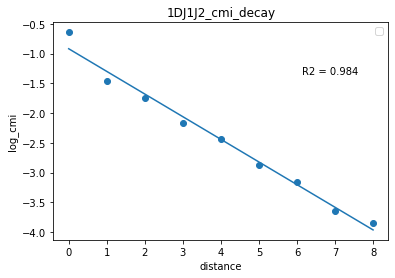

In [27]:

plt.scatter(np.arange(system_size-1), np.log(cmi_distance))
plt.plot(np.arange(system_size-1), a*np.arange(system_size-1)+b*np.ones(system_size-1))
plt.xlabel("distance")
plt.ylabel("log_cmi")
plt.figtext(0.7,0.7,'R2 = ' + str(np.round(r2,3)))
plt.title("1DJ1J2_cmi_decay")
plt.legend()
plt.savefig("1DJ1J2_cmi_decay.png", dpi = 200)

In [136]:
cmi

array([[ 1.02414222e+03,  9.90540048e-03, -2.84805390e-02,
        -1.24704659e-01, -1.99140819e-01, -2.47619828e-01,
        -2.84792882e-01, -3.20977706e-01, -3.52831031e-01,
        -1.02931811e+03],
       [ 0.00000000e+00,  1.02418884e+03,  1.81398781e-02,
        -9.48706211e-02, -2.01903296e-01, -3.01122722e-01,
        -4.06043003e-01, -4.68974828e-01, -5.30865417e-01,
        -1.02931811e+03],
       [ 0.00000000e+00,  0.00000000e+00,  1.02421737e+03,
         2.32592424e-02, -1.19781336e-01, -2.50526451e-01,
        -3.78778853e-01, -5.02592848e-01, -5.80311524e-01,
        -1.02931811e+03],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.02423016e+03,  2.49832260e-02, -1.36875720e-01,
        -2.87688828e-01, -4.14257030e-01, -5.42530233e-01,
        -1.02931811e+03],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.02422953e+03,  2.39796711e-02,
        -1.43568466e-01, -2.89370079e-01, -4.25584430e-01,
        -1.

In [200]:
a = np.array([1, 3, 2, 2,1,3,4])
auni = np.unique(a , return_index= True)
print(a[auni[1]])
auni[1]
a[np.sort(auni[1])]

[1 2 3 4]


array([1, 3, 2, 4])

In [6]:
np.array([[0,1,2,3], [2,3,4]])

array([list([0, 1, 2, 3]), list([2, 3, 4])], dtype=object)